In [1]:
import orca
import pandas as pd
from urbansim.models import MNLDiscreteChoiceModel

import models, utils
from urbansim.utils import misc, networks
import output_indicators

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

using seed 271828


In [ ]:
buildings = pd.HDFStore('building_store.h5').buildings

buildings_nonres = buildings[buildings.non_residential_sqft > 0]

jobs = orca.get_table('jobs').to_frame(['sector_id', 'building_id', 'home_based_status'])

jobs.building_id = jobs.building_id.astype('int')


## Sector 14

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -9218.098
Log-liklihood Ratio: 0.458

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Medical      |    3.000    |   0.036    |  83.282 |
| b_ln_non_residential_sqft    |    0.594    |   0.013    |  44.964 |
| zones_ln_empden_14           |    0.620    |   0.022    |  28.678 |
| nodes_walk_medical           |    0.004    |   0.000    |  17.575 |
| nodes_drv_log_sum_60min_jobs |    0.137    |   0.030    |  4.572  |
| nodes_drv_log_sum_20min_pop  |    0.054    |   0.030    |  1.776  |
+------------------------------+-------------+------------+---------+
None


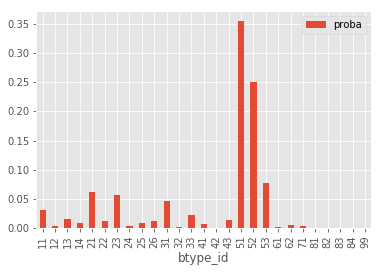

In [9]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Medical', 'b_ln_non_residential_sqft', 'zones_ln_empden_14',
                                               'nodes_walk_medical', 'nodes_drv_log_sum_60min_jobs', 'nodes_drv_log_sum_20min_pop'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 14) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [4]:
dcm.to_yaml('elcm14.yaml')

## Sector 6

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -7886.429
Log-liklihood Ratio: 0.536

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_TCU          |    1.733    |   0.039    |  44.944 |
| b_ln_non_residential_sqft    |    0.653    |   0.013    |  51.276 |
| zones_ln_empden_6            |    2.121    |   0.036    |  58.494 |
| nodes_drv_log_sum_60min_jobs |    0.166    |   0.010    |  17.382 |
| building_age                 |    -0.008   |   0.001    |  -7.989 |
+------------------------------+-------------+------------+---------+
None


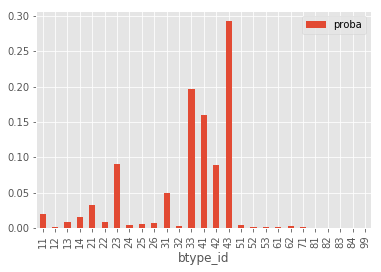

In [15]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_TCU', 'b_ln_non_residential_sqft', 'zones_ln_empden_6',
                                               'nodes_drv_log_sum_60min_jobs', 'building_age'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 6) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [13]:
dcm.to_yaml('elcm6.yaml')

## Sector 2

Null Log-liklihood: -17002.586
Log-liklihood at convergence: -13928.372
Log-liklihood Ratio: 0.181

+--------------------------------------+-------------+------------+---------+
| Component                            | Coefficient | Std. Error | T-Score |
+--------------------------------------+-------------+------------+---------+
| general_type_is_Office               |    1.203    |   0.036    |  33.067 |
| general_type_is_Industrial           |    0.900    |   0.038    |  23.479 |
| b_ln_non_residential_sqft            |    0.276    |   0.013    |  21.213 |
| zones_ln_empden_2                    |    2.172    |   0.056    |  39.130 |
| nodes_drv_log_sum_60min_jobs         |    0.081    |   0.010    |  8.199  |
| building_age                         |    -0.013   |   0.001    | -16.205 |
| nodes_walk_log_sum_residential_units |    -0.082   |   0.009    |  -8.630 |
| sqft_price_nonres                    |    -0.002   |   0.000    |  -4.583 |
+--------------------------------------+--

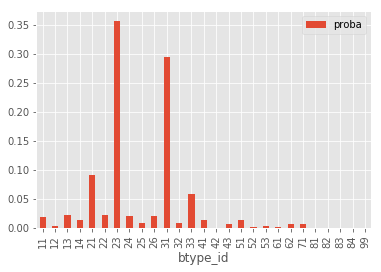

In [31]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Office', 'general_type_is_Industrial', 'b_ln_non_residential_sqft', 'zones_ln_empden_2',
                                               'nodes_drv_log_sum_60min_jobs', 'building_age', 'nodes_walk_log_sum_residential_units', 'sqft_price_nonres'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 2) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [32]:
dcm.to_yaml('elcm2.yaml')

## Sector 3

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -7185.002
Log-liklihood Ratio: 0.578

+--------------------------------------+-------------+------------+---------+
| Component                            | Coefficient | Std. Error | T-Score |
+--------------------------------------+-------------+------------+---------+
| general_type_is_Industrial           |    1.987    |   0.041    |  48.646 |
| b_ln_non_residential_sqft            |    0.877    |   0.006    | 158.178 |
| zones_ln_empden_3                    |    0.876    |   0.034    |  25.890 |
| nodes_walk_log_sum_residential_units |    -0.064   |   0.013    |  -4.906 |
| building_age                         |    -0.006   |   0.001    |  -6.021 |
| nodes_walk_office                    |    0.001    |   0.000    |  2.276  |
+--------------------------------------+-------------+------------+---------+
None


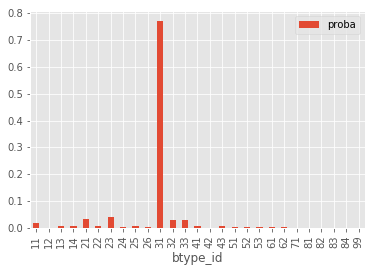

In [47]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Industrial', 'b_ln_non_residential_sqft', 'zones_ln_empden_3',
                                               'nodes_walk_log_sum_residential_units', 'building_age', 'nodes_walk_office'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 3) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [48]:
dcm.to_yaml('elcm3.yaml')

## Sector 4

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -11214.384
Log-liklihood Ratio: 0.341

+--------------------------------------+-------------+------------+---------+
| Component                            | Coefficient | Std. Error | T-Score |
+--------------------------------------+-------------+------------+---------+
| general_type_is_Industrial           |    0.876    |   0.033    |  26.608 |
| b_ln_non_residential_sqft            |    0.630    |   0.011    |  55.147 |
| zones_ln_empden_4                    |    1.994    |   0.046    |  43.657 |
| nodes_walk_log_sum_residential_units |    -0.086   |   0.011    |  -7.992 |
| building_age                         |    -0.011   |   0.001    | -14.106 |
| nodes_drv_log_sum_45min_jobs         |    0.123    |   0.009    |  14.138 |
+--------------------------------------+-------------+------------+---------+
None


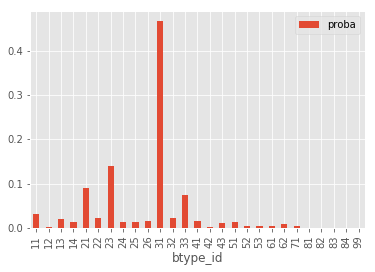

In [55]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Industrial', 'b_ln_non_residential_sqft', 'zones_ln_empden_4',
                                               'nodes_walk_log_sum_residential_units', 'building_age', 'nodes_drv_log_sum_45min_jobs'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 4) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [56]:
dcm.to_yaml('elcm4.yaml')

## Sector 5

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -9700.188
Log-liklihood Ratio: 0.430

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Retail       |    2.258    |   0.040    |  56.936 |
| b_ln_non_residential_sqft    |    0.822    |   0.012    |  70.110 |
| zones_ln_empden_5            |    0.795    |   0.033    |  23.993 |
| nodes_drv_log_sum_45min_jobs |    0.013    |   0.010    |  1.382  |
| building_age                 |    -0.014   |   0.001    | -16.802 |
| nodes_walk_ave_income        |    0.008    |   0.005    |  1.861  |
+------------------------------+-------------+------------+---------+
None


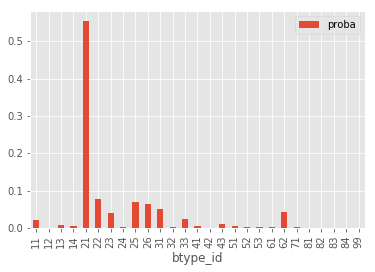

In [62]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Retail', 'b_ln_non_residential_sqft', 'zones_ln_empden_5',
                                               'nodes_drv_log_sum_45min_jobs', 'building_age', 'nodes_walk_ave_income'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 5) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [63]:
dcm.to_yaml('elcm5.yaml')

## Sector 8

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -9306.277
Log-liklihood Ratio: 0.453

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Office       |    1.533    |   0.036    |  42.010 |
| b_ln_non_residential_sqft    |    0.728    |   0.012    |  59.043 |
| zones_ln_empden_8            |    1.465    |   0.032    |  46.357 |
| nodes_drv_log_sum_30min_jobs |    0.050    |   0.010    |  5.032  |
| building_age                 |    -0.009   |   0.001    | -11.760 |
+------------------------------+-------------+------------+---------+
None


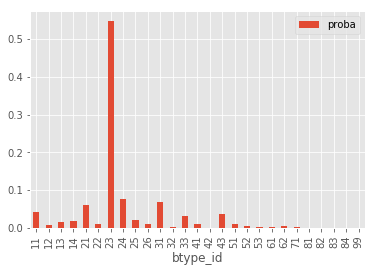

In [74]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Office', 'b_ln_non_residential_sqft', 'zones_ln_empden_8',
                                               'nodes_drv_log_sum_30min_jobs', 'building_age'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 8) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [75]:
dcm.to_yaml('elcm8.yaml')

## Sector 9

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -9525.123
Log-liklihood Ratio: 0.440

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Office       |    2.318    |   0.038    |  61.760 |
| b_ln_non_residential_sqft    |    0.553    |   0.013    |  41.141 |
| zones_ln_empden_9            |    0.870    |   0.026    |  33.578 |
| nodes_drv_log_sum_45min_jobs |    0.026    |   0.010    |  2.478  |
| building_age                 |    -0.013   |   0.001    | -16.723 |
| nodes_walk_residential       |    0.002    |   0.000    |  9.852  |
+------------------------------+-------------+------------+---------+
None


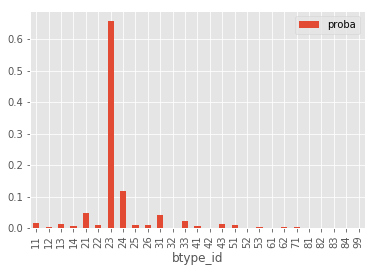

In [80]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Office', 'b_ln_non_residential_sqft', 'zones_ln_empden_9',
                                               'nodes_drv_log_sum_45min_jobs', 'building_age', 'nodes_walk_residential'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 9) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [81]:
dcm.to_yaml('elcm9.yaml')

## ELCM10

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -7787.912
Log-liklihood Ratio: 0.542

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Office       |    1.736    |   0.039    |  44.216 |
| b_ln_non_residential_sqft    |    0.813    |   0.014    |  59.482 |
| zones_ln_empden_10           |    0.953    |   0.022    |  43.179 |
| nodes_drv_log_sum_45min_jobs |    0.094    |   0.011    |  8.540  |
| building_age                 |    -0.012   |   0.001    | -14.258 |
| nodes_walk_residential       |    0.001    |   0.000    |  2.985  |
+------------------------------+-------------+------------+---------+
None


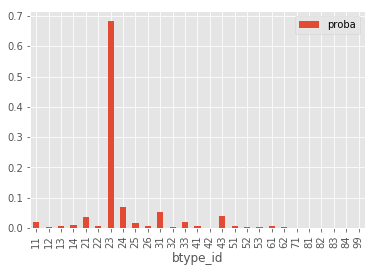

In [84]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Office', 'b_ln_non_residential_sqft', 'zones_ln_empden_10',
                                               'nodes_drv_log_sum_45min_jobs', 'building_age', 'nodes_walk_residential'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 10) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [85]:
dcm.to_yaml('elcm10.yaml')

## Sector 11

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -2189.455
Log-liklihood Ratio: 0.871

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Office       |    0.853    |   0.074    |  11.452 |
| b_ln_non_residential_sqft    |    1.046    |   0.025    |  41.379 |
| zones_ln_empden_11           |    2.920    |   0.038    |  77.463 |
| nodes_drv_log_sum_30min_jobs |    0.451    |   0.021    |  22.005 |
| building_age                 |    -0.025   |   0.002    | -16.192 |
+------------------------------+-------------+------------+---------+
None


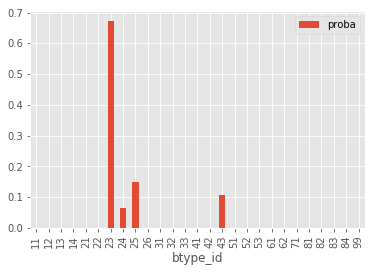

In [88]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Office', 'b_ln_non_residential_sqft', 'zones_ln_empden_11',
                                               'nodes_drv_log_sum_30min_jobs', 'building_age'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 11) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [89]:
dcm.to_yaml('elcm11.yaml')

## Sector 16

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -10132.771
Log-liklihood Ratio: 0.404

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Retail       |    1.969    |   0.046    |  43.244 |
| building_type_id_is_26       |    2.355    |   0.041    |  56.774 |
| b_ln_non_residential_sqft    |    0.699    |   0.012    |  57.100 |
| zones_ln_empden_16           |    0.738    |   0.023    |  32.449 |
| nodes_drv_log_sum_30min_jobs |    0.019    |   0.010    |  1.900  |
| building_age                 |    -0.013   |   0.001    | -18.974 |
+------------------------------+-------------+------------+---------+
None


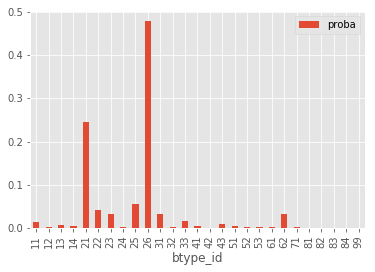

In [97]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Retail', 'building_type_id_is_26', 'b_ln_non_residential_sqft', 'zones_ln_empden_16',
                                               'nodes_drv_log_sum_30min_jobs', 'building_age'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 16) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [98]:
dcm.to_yaml('elcm16.yaml')

## Sector 17

Null Log-liklihood: -17005.987
Log-liklihood at convergence: -15226.013
Log-liklihood Ratio: 0.105

+------------------------------+-------------+------------+---------+
| Component                    | Coefficient | Std. Error | T-Score |
+------------------------------+-------------+------------+---------+
| general_type_is_Retail       |    0.796    |   0.034    |  23.105 |
| general_type_is_Office       |    0.657    |   0.041    |  16.030 |
| b_ln_non_residential_sqft    |    0.497    |   0.010    |  47.662 |
| zones_ln_empden_17           |    0.802    |   0.040    |  19.886 |
| nodes_drv_log_sum_30min_jobs |    0.121    |   0.009    |  14.044 |
| building_age                 |    -0.002   |   0.001    |  -2.291 |
+------------------------------+-------------+------------+---------+
None


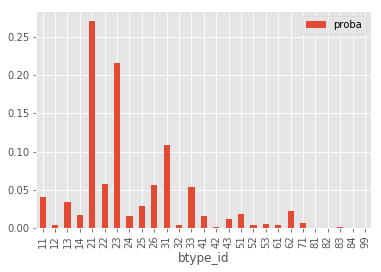

In [103]:
dcm = MNLDiscreteChoiceModel(model_expression=['general_type_is_Retail', 'general_type_is_Office', 'b_ln_non_residential_sqft', 'zones_ln_empden_17',
                                               'nodes_drv_log_sum_30min_jobs', 'building_age'],
                             sample_size=30,
                             probability_mode='single_chooser',
                             choice_mode='aggregate',
                             estimation_sample_size=5000,
                             choosers_fit_filters="(sector_id == 17) & (home_based_status == 0)")

dcm.fit(jobs, buildings_nonres, 'building_id')

print dcm.report_fit()
proba = dcm.probabilities(jobs, buildings_nonres).reset_index().set_index('alternative_id')[0]
pd.DataFrame({'proba':proba, 'btype_id':buildings.building_type_id}).groupby('btype_id').sum().plot.bar()

In [104]:
dcm.to_yaml('elcm17.yaml')